In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.options.display.max_columns = None

In [3]:
path = '../../Github/python-data-science/data/'

In [4]:
df = pd.read_csv(path+'bank-full.csv')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
df['subscribed'].value_counts(dropna=False)

no     36548
yes     4640
Name: subscribed, dtype: int64

In [16]:
df.select_dtypes(object).apply(np.unique)

job            [admin., blue-collar, entrepreneur, housemaid,...
marital                     [divorced, married, single, unknown]
education      [basic.4y, basic.6y, basic.9y, high.school, il...
default                                       [no, unknown, yes]
housing                                       [no, unknown, yes]
loan                                          [no, unknown, yes]
contact                                    [cellular, telephone]
month          [apr, aug, dec, jul, jun, mar, may, nov, oct, ...
day_of_week                            [fri, mon, thu, tue, wed]
poutcome                         [failure, nonexistent, success]
subscribed                                             [no, yes]
dtype: object

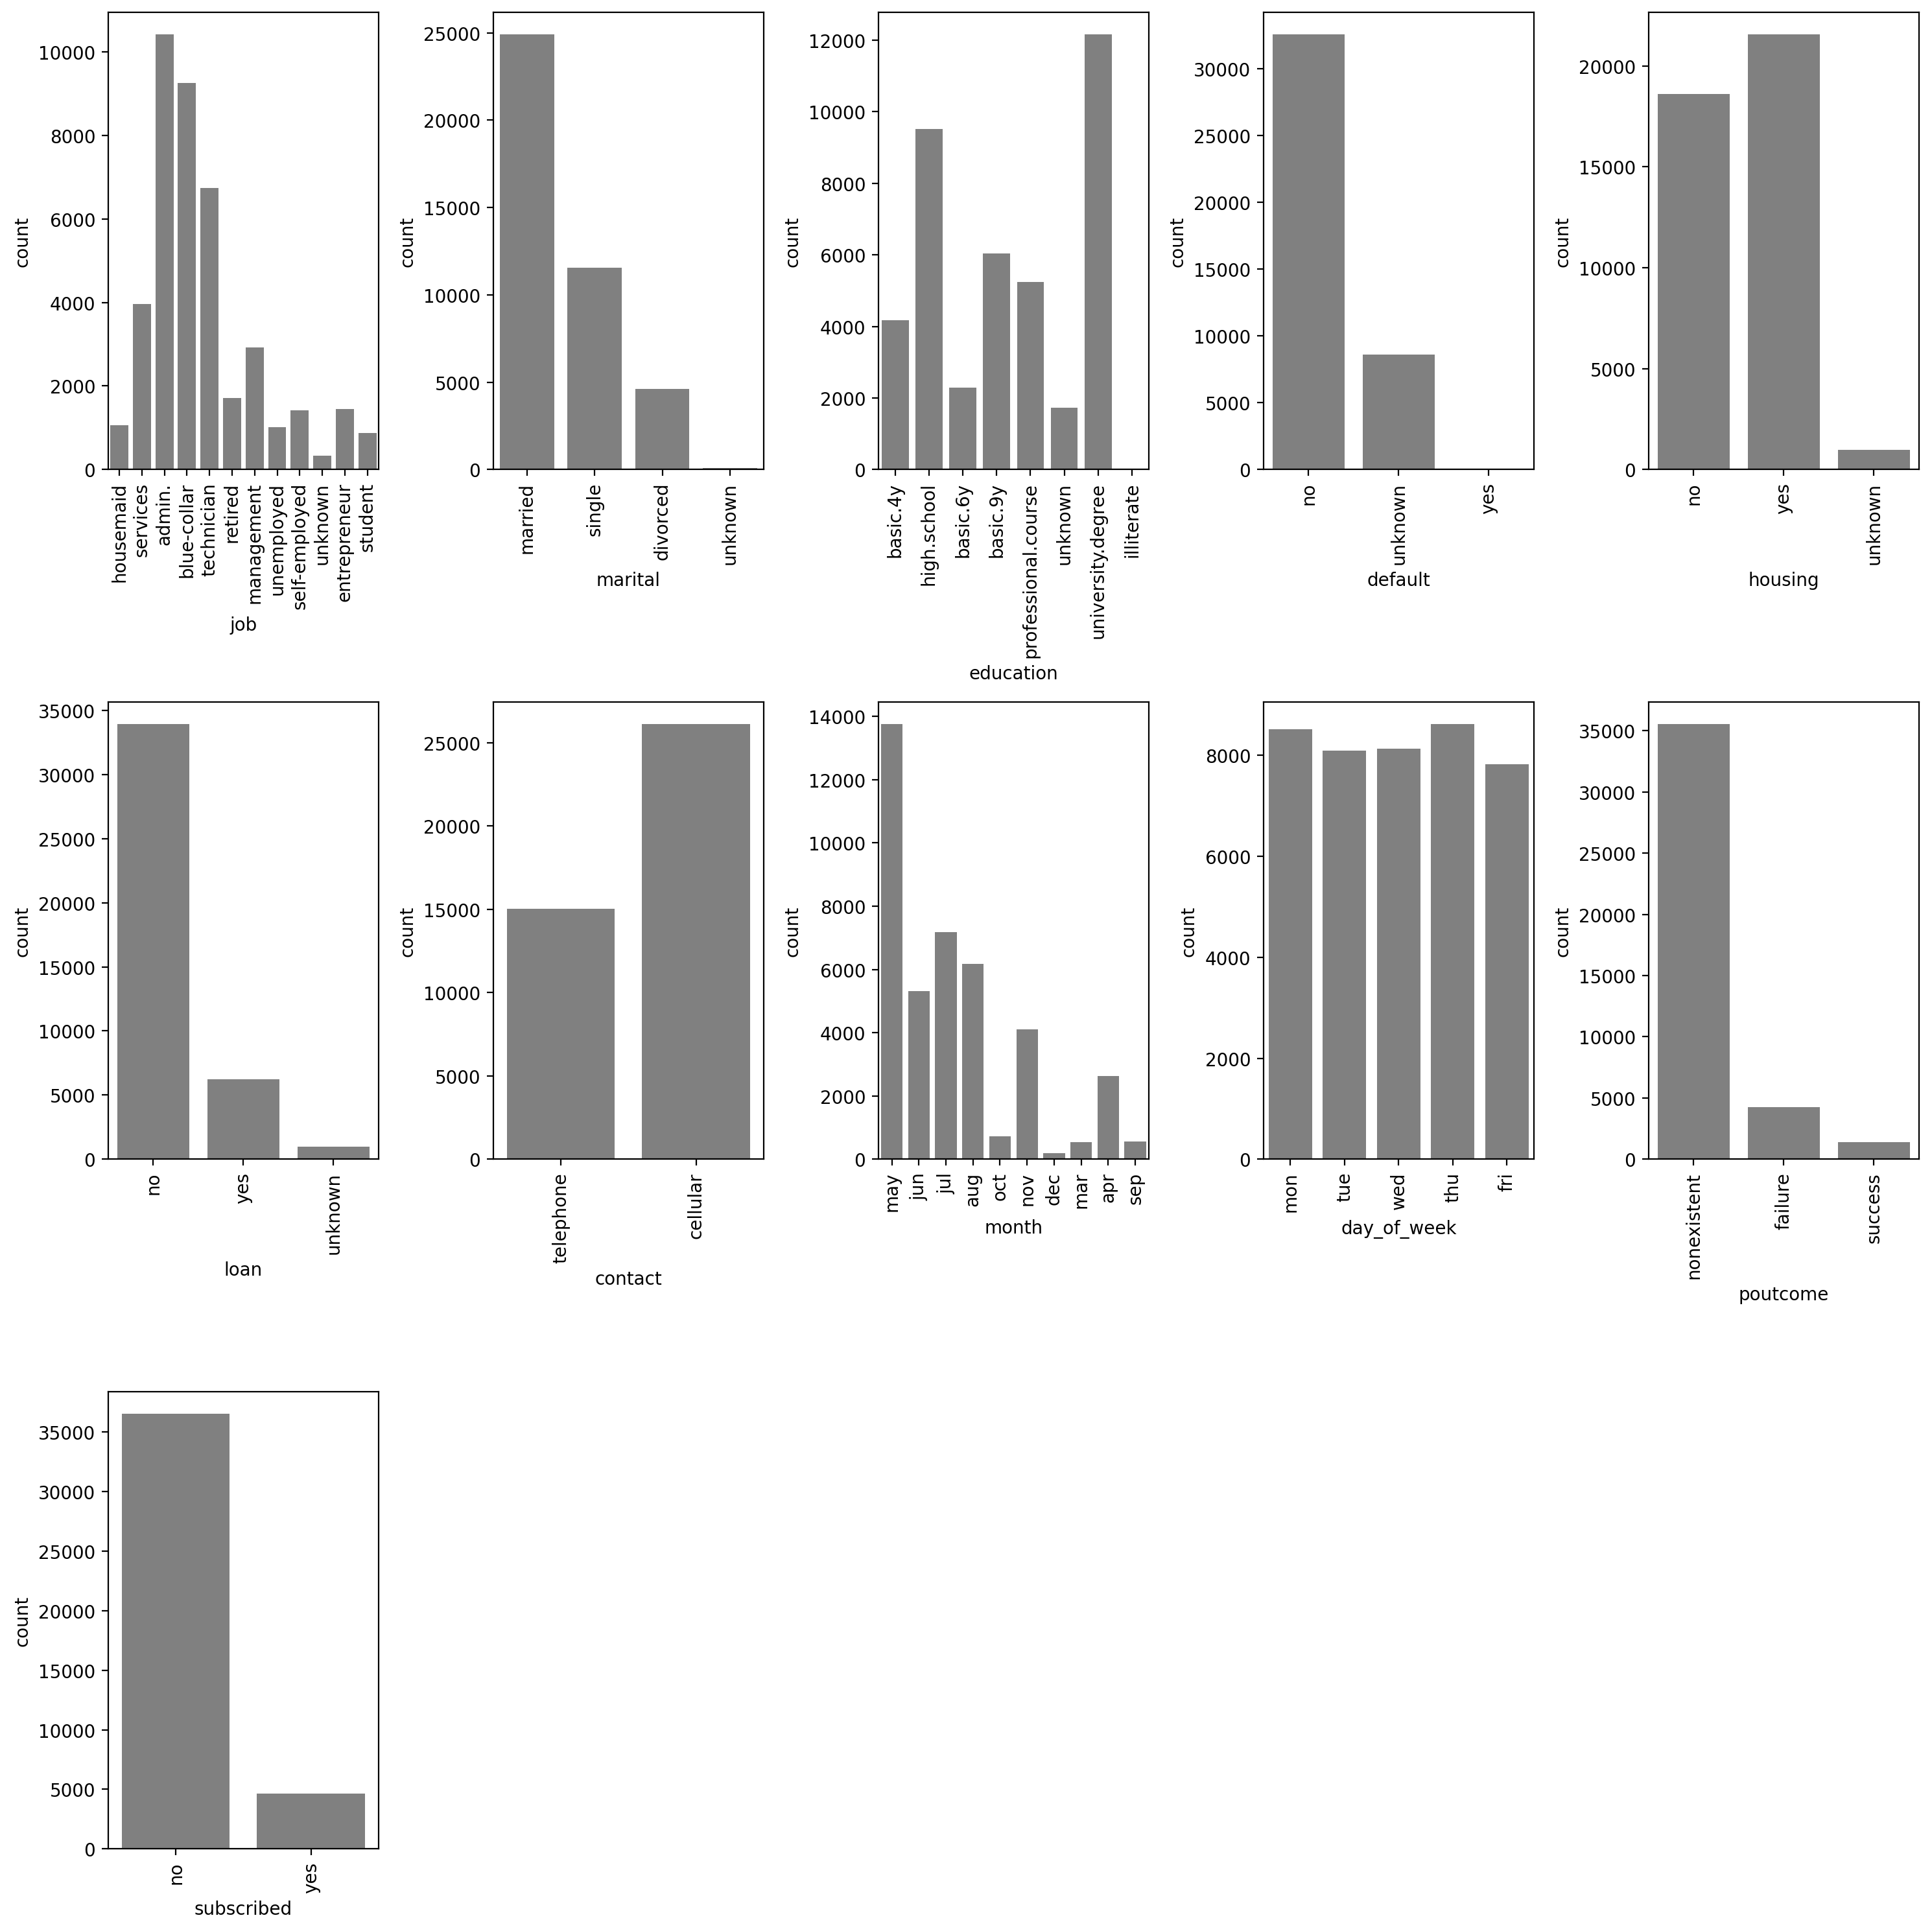

In [59]:
cols = df.select_dtypes(object).columns
ncols = 5
nrows = int(np.ceil(len(cols)/ncols))
plt.figure(figsize=(15,15), dpi=200)
for ix, i in enumerate(cols):
    plt.subplot(nrows, ncols, ix+1), sns.countplot(data=df, x=i, color='grey');
    plt.xticks(rotation=90)
plt.tight_layout()

In [62]:
df['pdays'].value_counts(dropna=False)

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

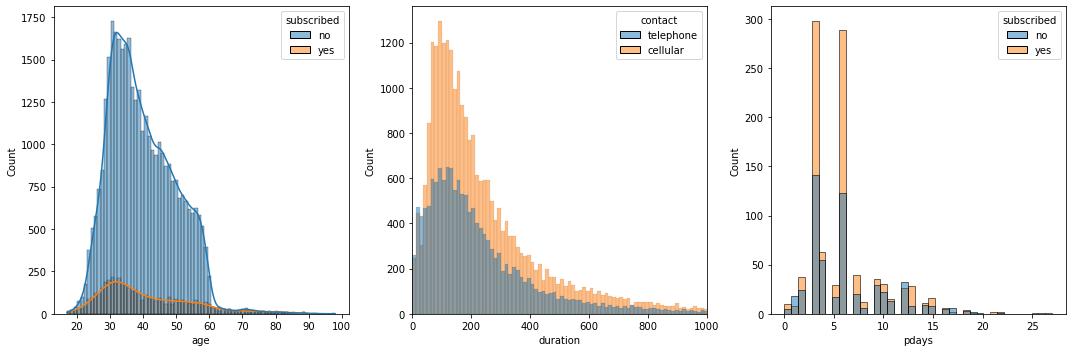

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), sns.histplot(data=df, x='age', bins=80, hue='subscribed', kde=True);
plt.subplot(1,3,2), sns.histplot(data=df, x='duration', hue='contact').set(xlim=(0,1000));
plt.subplot(1,3,3), sns.histplot(data=df[df['pdays']!=999], x='pdays', hue='subscribed');
plt.tight_layout()

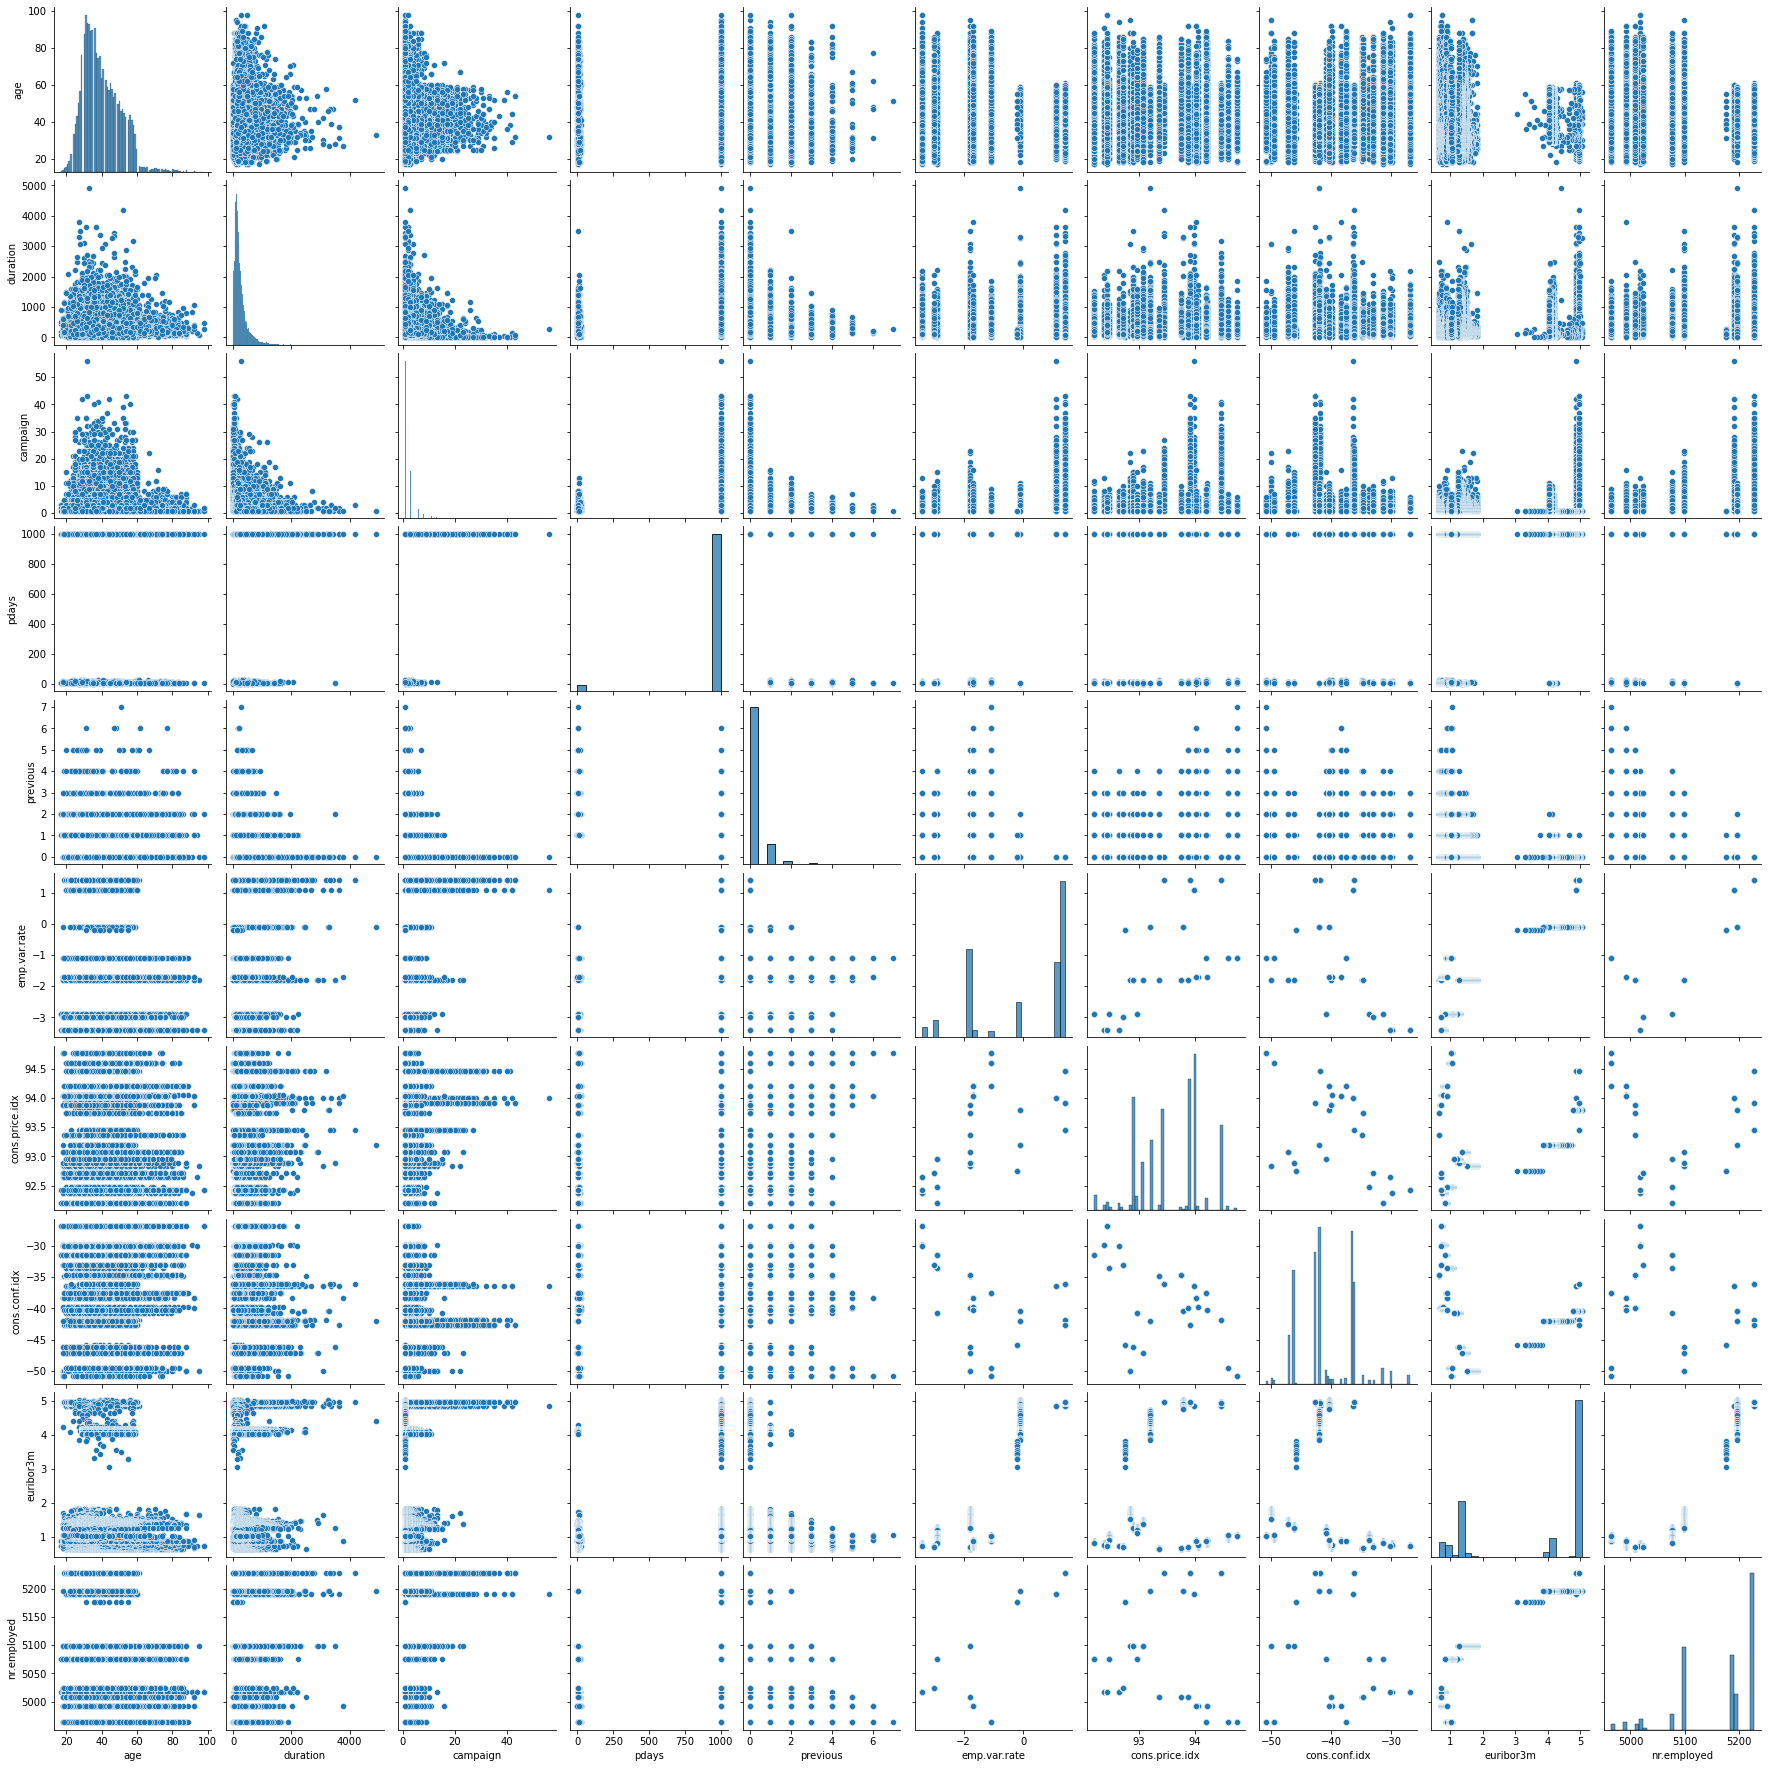

In [63]:
sns.pairplot(df)

---

## Prepping data & fitting K-means

In [103]:
X = pd.get_dummies(df, drop_first=True)

In [104]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [136]:
X.shape

(41188, 55)

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
sc = StandardScaler()

In [107]:
Xs = sc.fit_transform(X)

In [108]:
from sklearn.cluster import KMeans

In [109]:
# help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

In [110]:
km = KMeans(n_clusters=3)

In [111]:
X['Cat'] = km.fit_predict(Xs)

In [112]:
km.cluster_centers_.shape

(3, 54)

In [129]:
km.inertia_  # sum of squared distance b/w point and its cluster

1947279.3035364847

In [113]:
km.labels_[-10:]

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2])

In [114]:
X['Cat'][-10:]

41178    0
41179    2
41180    2
41181    2
41182    0
41183    2
41184    2
41185    2
41186    2
41187    2
Name: Cat, dtype: int32

In [115]:
X.sample(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes,Cat
13095,29,280,5,999,0,1.4,93.918,-42.7,4.962,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
38445,22,270,3,6,1,-3.4,92.431,-26.9,0.730,5017.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
6747,56,300,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
3872,36,192,20,999,0,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4774,56,136,1,999,0,1.1,93.994,-36.4,4.858,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1


In [116]:
X['Cat'].value_counts()

1    24140
2    15529
0     1519
Name: Cat, dtype: int64

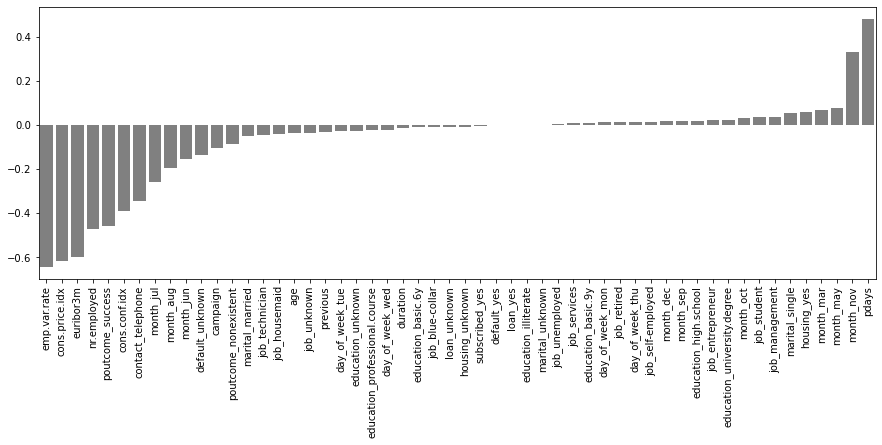

In [128]:
p = X.corr()['Cat'].sort_values()[:-1]
plt.figure(figsize=(15,5))
sns.barplot(x=p.index, y=p.values, color='grey');
plt.xticks(rotation=90);

In [137]:
ssd = []
for k in range(2,25):
    kn = KMeans(n_clusters=k)
    kn.fit(Xs)
    
    ssd.append(kn.inertia_)

print(ssd)

[2042697.98174686, 1947280.4047492011, 1892301.4177265975, 1829274.9525980514, 1776483.4697196453, 1711594.180080187, 1664146.325458399, 1632224.0331050365, 1602382.792287542, 1568274.3039322929, 1520856.8834534083, 1507351.5155840819, 1469381.0411320187, 1441953.7951757254, 1417591.9580466566, 1362797.6995034667, 1352891.115091226, 1339366.991838701, 1325458.2589493056, 1265327.0303233487, 1245620.2051956926, 1215620.5610309762, 1180502.5281142218]


<AxesSubplot:>

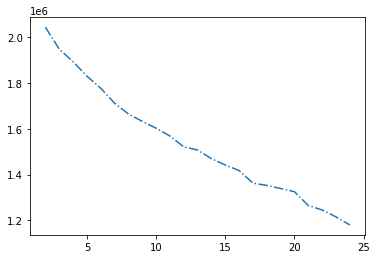

In [150]:
sns.lineplot(x=list(range(2,25)), y=ssd, ls='dashdot')

<AxesSubplot:>

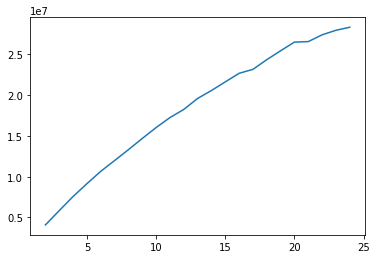

In [157]:
sns.lineplot(x=list(range(2,25)), y=ssd*np.array(range(2,25)))

In [158]:
pd.Series(ssd).diff()

0              NaN
1    -95417.576998
2    -54978.987023
3    -63026.465129
4    -52791.482878
5    -64889.289639
6    -47447.854622
7    -31922.292353
8    -29841.240817
9    -34108.488355
10   -47417.420479
11   -13505.367869
12   -37970.474452
13   -27427.245956
14   -24361.837129
15   -54794.258543
16    -9906.584412
17   -13524.123253
18   -13908.732889
19   -60131.228626
20   -19706.825128
21   -29999.644165
22   -35118.032917
dtype: float64

---

In [160]:
import matplotlib.image as mpimg  # jpg, png into numpy array

In [163]:
image_array = mpimg.imread('../../Github/python-data-science/data/palm_trees.jpg')

In [164]:
image_array.shape

(1401, 934, 3)

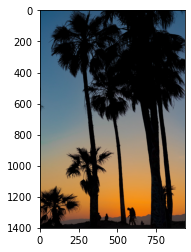

In [166]:
plt.imshow(image_array);

In [167]:
image_array_2d = image_array.reshape(1401*934,3)

In [168]:
image_array_2d.shape

(1308534, 3)

In [169]:
# Reduce to 6 colors
kn = KMeans(n_clusters=6)

In [170]:
labels = kn.fit_predict(image_array_2d)

In [175]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([174299,  76578, 157574, 185932, 602548, 111603], dtype=int64))

In [176]:
kn.cluster_centers_

array([[ 71.14046911, 109.10326951, 137.41378655],
       [ 66.9833904 ,  61.29081833,  61.54028907],
       [191.41563975, 154.47484037, 109.57883225],
       [136.56429063, 143.64656544, 143.91952522],
       [  2.74416554,   2.54395103,   3.65174237],
       [219.00807226, 135.44460308,  47.02470167]])

In [179]:
rgb_codes = np.round(kn.cluster_centers_,0).astype(int)

In [180]:
rgb_codes

array([[ 71, 109, 137],
       [ 67,  61,  62],
       [191, 154, 110],
       [137, 144, 144],
       [  3,   3,   4],
       [219, 135,  47]])

In [182]:
image_red_2d = np.array([rgb_codes[i] for i in labels], dtype=int)

In [183]:
image_red_2d.shape

(1308534, 3)

In [184]:
image_red_3d = image_red_2d.reshape(1401,934,3)

In [185]:
image_red_3d.shape

(1401, 934, 3)

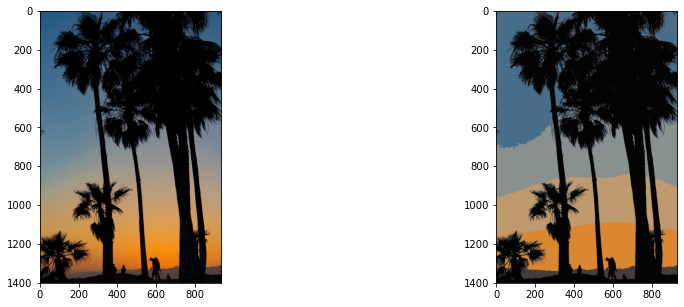

In [186]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1), plt.imshow(image_array);
plt.subplot(1,2,2), plt.imshow(image_red_3d);

In [187]:
def reduce_color(n, image_array_2d):
    kn = KMeans(n_clusters=n)
    labels = kn.fit_predict(image_array_2d)
    rgb_codes = np.round(kn.cluster_centers_,0).astype(int)
    image_red_2d = np.array([rgb_codes[i] for i in labels], dtype=int)
    image_red_3d = image_red_2d.reshape(1401,934,3)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1), plt.imshow(image_array);
    plt.subplot(1,2,2), plt.imshow(image_red_3d);

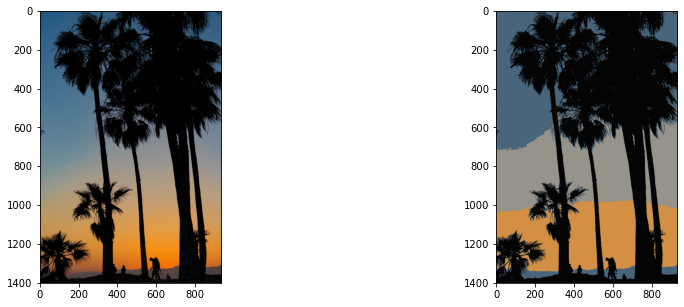

In [188]:
reduce_color(4, image_array_2d)

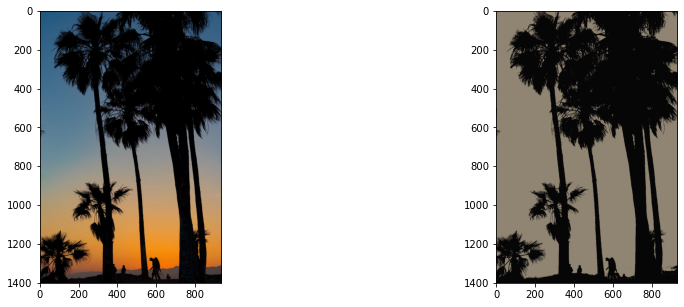

In [189]:
reduce_color(2, image_array_2d)